# DR12Q Superset Catalogue

See the section *Previously released SDSS quasar catalogs* on [The Sloan Digital Sky Survey Quasar Catalog: fourteenth data release](https://www.sdss.org/dr14/algorithms/qso_catalog/).
QSOs catalogue are [on the SAS](https://data.sdss.org/sas/dr14/eboss/qso/).
Data model of the `Superset_DR12Q.fits` file is on [data.sdss.org](https://data.sdss.org/datamodel/files/BOSS_QSO/DR12Q/DR12Q_superset.html).

In [1]:
using DataFrames, FITSIO, HDF5, Statistics, StatsPlots

In [2]:
include("BayesianSZNet.jl")
using .BayesianSZNet

In [3]:
# Read data of SDSS DR12Q superset into a data frame.
superset_fits = FITS("data/Superset_DR12Q.fits")
superset = DataFrame(
    plate=read(superset_fits[2], "PLATE"),
    mjd=read(superset_fits[2], "MJD"),
    fiberid=read(superset_fits[2], "FIBERID"),
    z_vi=read(superset_fits[2], "Z_VI"),
    z_pipe=read(superset_fits[2], "Z_PIPE"),
    class_person=read(superset_fits[2], "CLASS_PERSON"),
    z_conf_person=read(superset_fits[2], "Z_CONF_PERSON"))

,plate,mjd,fiberid,z_vi,z_pipe,class_person,z_conf_person
,Int32,Int32,Int32,Float64,Float32,Int32,Int32
1,6511,56540,892,0.0,-0.000648504,1,3
2,6511,56540,156,0.0,-6.53803e-5,1,3
3,7147,56574,160,0.0,-0.000556255,1,3
4,6127,56274,950,0.0,-0.000258873,1,3
5,6173,56238,528,2.309,2.3091,3,3
6,6207,56239,156,0.0,-1.66541e-5,1,3
7,6511,56540,82,0.0,-0.000992372,1,3
8,6177,56268,595,2.497,2.49794,3,3
9,4415,55831,464,1.619,1.61885,3,3


In [4]:
writelst("data/dr12q_superset.lst", superset.plate, superset.mjd, superset.fiberid)

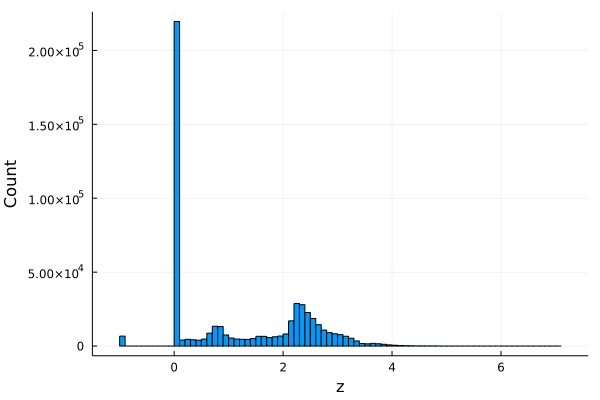

In [5]:
@df superset histogram(:z_vi, xlabel="z", ylabel="Count", legend=:none)

In [6]:
# There are redshifts smaller than 0.
lt_zero_idx = superset.z_vi .< 0.0
sum(lt_zero_idx), unique(superset[lt_zero_idx, :z_vi])

(6743, [-1.0, -0.001, -0.004, -0.002, -0.003, -0.008])

`CLASS_PERSON` with value 1 or 4 and `Z_CONF_PERSON` with value 3 is `Star`, resp. `Galaxy`.

In [7]:
# Get only those greater than -1.0 because -1.0 is the "missing value".
gt_minus_one_idx = -1.0 .< superset.z_vi
superset[gt_minus_one_idx .& lt_zero_idx, :]

,plate,mjd,fiberid,z_vi,z_pipe,class_person,z_conf_person
,Int32,Int32,Int32,Float64,Float32,Int32,Int32
1,3672,55484,934,-0.001,-0.000153588,4,3
2,3800,55486,66,-0.001,-0.000537971,4,3
3,3816,55272,428,-0.001,1.77361,1,3
4,3816,55272,680,-0.001,1.60284,1,3
5,3816,55272,683,-0.004,0.000211646,1,3
6,3816,55272,746,-0.004,0.000826485,1,3
7,3783,55246,618,-0.001,0.000990788,1,3
8,3783,55246,758,-0.001,-0.000616998,1,3
9,3783,55246,200,-0.001,-0.000344532,1,3


For now leave them aside. It is small amout (6743) versus full superset (546856).

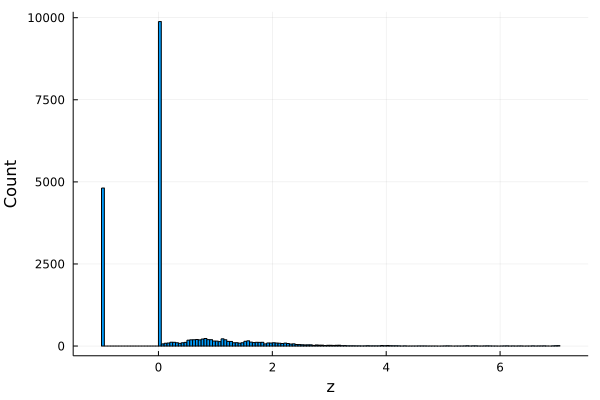

In [8]:
# Get only those with confident redshift.
conf_z_idx = superset.z_conf_person .== 3
histogram(superset[.~conf_z_idx, :z_vi], xlabel="z", ylabel="Count", legend=:none)

In [9]:
subset = superset[gt_minus_one_idx .& conf_z_idx, :]

,plate,mjd,fiberid,z_vi,z_pipe,class_person,z_conf_person
,Int32,Int32,Int32,Float64,Float32,Int32,Int32
1,6511,56540,892,0.0,-0.000648504,1,3
2,6511,56540,156,0.0,-6.53803e-5,1,3
3,7147,56574,160,0.0,-0.000556255,1,3
4,6127,56274,950,0.0,-0.000258873,1,3
5,6173,56238,528,2.309,2.3091,3,3
6,6207,56239,156,0.0,-1.66541e-5,1,3
7,6511,56540,82,0.0,-0.000992372,1,3
8,6177,56268,595,2.497,2.49794,3,3
9,4415,55831,464,1.619,1.61885,3,3


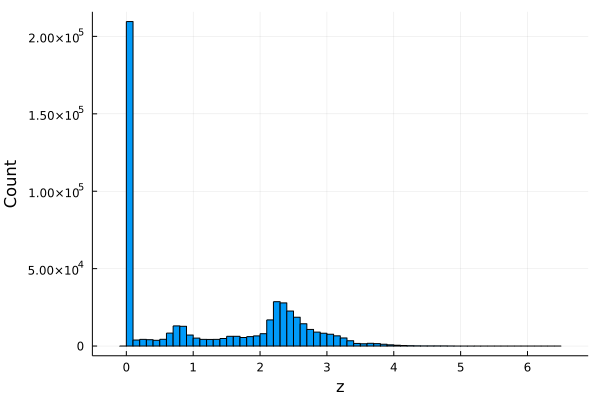

In [10]:
@df subset histogram(:z_vi, xlabel="z", ylabel="Count", legend=:none)

## Wavelength Range

We need `specObj-dr12.fits` file available [on the SAS](https://data.sdss.org/sas/dr12/sdss/spectro/redux/).
From [data model](https://data.sdss.org/datamodel/files/SPECTRO_REDUX/specObj.html): `WAVEMIN` is 'Minimum observed (vacuum) wavelength (Angstroms)';
and `WAVEMAX` is 'Maximum observed (vacuum) wavelength (Angstroms)'

In [11]:
specobj_fits = FITS("data/specObj-dr12.fits")
specobj = DataFrame(
    plate=read(specobj_fits[2], "PLATE"),
    mjd=read(specobj_fits[2], "MJD"),
    fiberid=read(specobj_fits[2], "FIBERID"),
    wavemin=read(specobj_fits[2], "WAVEMIN"),
    wavemax=read(specobj_fits[2], "WAVEMAX"))

,plate,mjd,fiberid,wavemin,wavemax
,Int32,Int32,Int32,Float32,Float32
1,266,51602,1,3806.27,9202.38
2,266,51602,2,3806.27,9202.38
3,266,51602,3,3806.27,9202.38
4,266,51602,4,3806.27,9202.38
5,266,51602,5,3805.4,9202.38
6,266,51602,6,3805.4,9202.38
7,266,51602,7,3805.4,9202.38
8,266,51602,8,3805.4,9202.38
9,266,51602,9,3804.52,9202.38


In [12]:
# Join "WAVEMIN" and "WAVEMAX" to the superset.
wave_subset = leftjoin(subset, specobj, on=[:plate, :mjd, :fiberid])

,plate,mjd,fiberid,z_vi,z_pipe,class_person,z_conf_person,wavemin
,Int32,Int32,Int32,Float64,Float32,Int32,Int32,Float32?
1,3586,55181,16,2.242,2.24233,3,3,3601.64
2,3586,55181,32,0.0,-0.00319402,1,3,3601.64
3,3586,55181,36,0.0,-0.000469572,1,3,3601.64
4,3586,55181,38,2.196,2.16551,30,3,3601.64
5,3586,55181,40,0.0,-0.000495647,1,3,3601.64
6,3586,55181,50,0.0,-0.000177818,1,3,3601.64
7,3586,55181,58,0.0,-0.000513507,1,3,3601.64
8,3586,55181,60,0.0,-0.000627501,1,3,3601.64
9,3586,55181,72,0.0,-8.91876e-5,1,3,3601.64


In [13]:
wavemin_zero_idx = wave_subset.wavemin .== 0.0
wavemax_zero_idx = wave_subset.wavemax .== 0.0
sum(wavemin_zero_idx), sum(wavemax_zero_idx)

(65, 65)

In [14]:
wave_subset[wavemin_zero_idx, :]

,plate,mjd,fiberid,z_vi,z_pipe,class_person,z_conf_person,wavemin
,Int32,Int32,Int32,Float64,Float32,Int32,Int32,Float32?
1,3656,55241,483,0.0,0.0,1,3,0.0
2,3666,55185,850,0.0,0.0,1,3,0.0
3,3676,55186,770,0.0,0.0,1,3,0.0
4,3678,55208,850,2.096,0.0,3,3,0.0
5,3744,55209,38,0.0,0.0,1,3,0.0
6,3771,55544,10,0.0,0.0,1,3,0.0
7,3771,55544,880,0.0,0.0,1,3,0.0
8,3815,55537,487,0.0,0.0,1,3,0.0
9,3827,55565,356,0.0,0.0,1,3,0.0


In [15]:
# Write spectra without "WAVEMIN" and "WAVEMAX" to a file.
writelst("data/dr12q_superset.err", wave_subset[wavemin_zero_idx, :plate], wave_subset[wavemin_zero_idx, :mjd], wave_subset[wavemin_zero_idx, :fiberid])

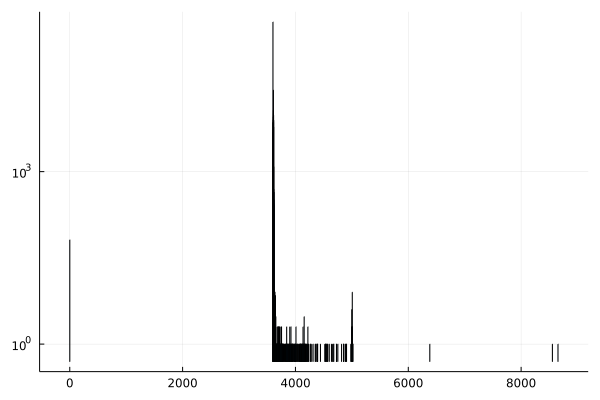

In [16]:
@df wave_subset histogram(:wavemin, legend=:none, yaxis=:log)

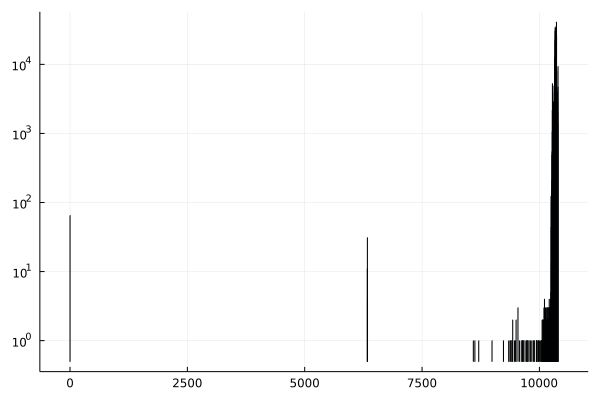

In [17]:
@df wave_subset histogram(:wavemax, legend=:none, yaxis=:log)

In [18]:
wavemin = quantile(wave_subset[.~wavemin_zero_idx, :wavemin], 0.99)
wavemax = quantile(wave_subset[.~wavemax_zero_idx, :wavemax], 0.01)
logwavemin, logwavemax = log10(wavemin), log10(wavemax)
wavemin, wavemax, logwavemin, logwavemax

(3614.930908203125, 10275.4296875, 3.5581000010848016, 4.011799991814129)

In [19]:
final_subset = wave_subset[.~wavemin_zero_idx, :]

,plate,mjd,fiberid,z_vi,z_pipe,class_person,z_conf_person,wavemin
,Int32,Int32,Int32,Float64,Float32,Int32,Int32,Float32?
1,3586,55181,16,2.242,2.24233,3,3,3601.64
2,3586,55181,32,0.0,-0.00319402,1,3,3601.64
3,3586,55181,36,0.0,-0.000469572,1,3,3601.64
4,3586,55181,38,2.196,2.16551,30,3,3601.64
5,3586,55181,40,0.0,-0.000495647,1,3,3601.64
6,3586,55181,50,0.0,-0.000177818,1,3,3601.64
7,3586,55181,58,0.0,-0.000513507,1,3,3601.64
8,3586,55181,60,0.0,-0.000627501,1,3,3601.64
9,3586,55181,72,0.0,-8.91876e-5,1,3,3601.64


In [20]:
size(superset, 1), size(subset, 1), size(final_subset, 1)

(546856, 523396, 523331)

## HDF5

In [21]:
id = Matrix{Int32}(undef, 3, size(final_subset, 1))
id[1, :] = final_subset.plate
id[2, :] = final_subset.mjd
id[3, :] = final_subset.fiberid
id

3×523331 Array{Int32,2}:
  3586   3586   3586   3586   3586  …   7563   7565   7565   7565   7565
 55181  55181  55181  55181  55181     56810  56809  56809  56809  56809
    16     32     36     38     40       230    126    658    808    869

In [22]:
# read-write, create file if not existing, preserve existing contents
fid = h5open("data/dr12q_superset.hdf5", "cw")
write_dataset(fid, "id", id)
write_dataset(fid, "z_vi", convert(Vector{Float32}, final_subset.z_vi))
write_dataset(fid, "z_pipe", convert(Vector{Float32}, final_subset.z_pipe))
close(fid)

LoadError: [91mcannot create dataset: object "id" already exists at /[39m